In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [4]:
import pandas as pd 
import numpy as np 
import tensorflow as tf
from tensorflow import keras 
from keras.datasets import cifar10
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Input
from keras.models import Sequential , Model 
from keras.utils import to_categorical
from keras.applications.vgg16 import VGG16
from keras.applications import ResNet50, MobileNetV2, InceptionV3
import matplotlib.pyplot as plt 


2025-08-24 09:20:52.392792: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1756027252.555861      36 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1756027252.602568      36 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [31]:
(x_train,y_train),(x_test,y_test) = cifar10.load_data()

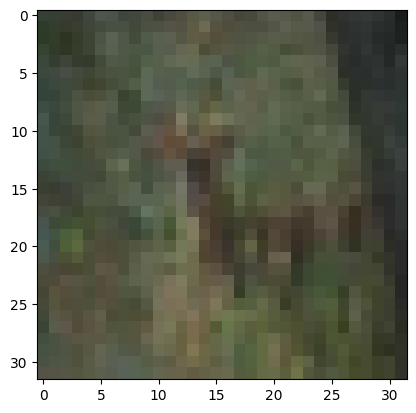

In [4]:
y_train

array([[6],
       [9],
       [9],
       ...,
       [9],
       [1],
       [1]], dtype=uint8)

In [35]:
from tensorflow.keras.utils import to_categorical
# x_train = x_train.reshape((x_train.shape[0], 28, 28, 1))
# x_test = x_test.reshape((x_test.shape[0], 28, 28, 1))


x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

In [16]:
from keras.layers import BatchNormalization,Dropout

In [54]:
model = Sequential()

model.add(Conv2D(32,(3,3),activation='relu',input_shape = (32,32,3)))
model.add(MaxPooling2D((2,2),padding='valid'))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPooling2D((2,2),padding='valid'))
model.add(Conv2D(128,(3,3),activation='relu'))
model.add(MaxPooling2D((2,2),padding='valid'))
model.add(Flatten())

model.add(Dense(164,activation='relu',kernel_regularizer='l2'))
model.add(Dropout(0.5))
model.add(BatchNormalization())
model.add(Dense(64,activation = 'relu',kernel_regularizer='l2'))
model.add(Dropout(0.5))
model.add(BatchNormalization())
model.add(Dense(10,activation='softmax'))

model.summary()

Model: "sequential_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_24 (Conv2D)              │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_24 (MaxPooling2D) │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_25 (Conv2D)              │ (None, 13, 13, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_25 (MaxPooling2D) │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_26 (Conv2D)              │ (None, 4, 4, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_26 (MaxPooling2D) │ (None, 2, 2, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_10 (Flatten)            │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_25 (Dense)                │ (None, 164)            │        84,132 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_11 (Dropout)            │ (None, 164)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_9           │ (None, 164)            │           656 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_26 (Dense)                │ (None, 64)             │        10,560 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_12 (Dropout)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_10          │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_27 (Dense)                │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 189,502 (740.24 KB)

 Trainable params: 189,046 (738.46 KB)

 Non-trainable params: 456 (1.78 KB)

In [55]:
model.compile(optimizer = 'adam', loss='categorical_crossentropy', metrics = ['accuracy'])

In [56]:
callbacks = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    min_delta=0,
    patience=3,
    verbose=0,
    mode='auto',
    baseline=None,
    restore_best_weights=False,
    start_from_epoch=0
)

In [57]:
history = model.fit(x_train,y_train,epochs=25,validation_data = (x_test,y_test),batch_size = 64, callbacks = callbacks)

Epoch 1/25
782/782 ━━━━━━━━━━━━━━━━━━━━ 13s 9ms/step - accuracy: 0.2002 - loss: 3.5324 - val_accuracy: 0.3410 - val_loss: 1.9959
Epoch 2/25
782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.4381 - loss: 1.6906 - val_accuracy: 0.5523 - val_loss: 1.3594
Epoch 3/25
782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.5241 - loss: 1.4499 - val_accuracy: 0.5696 - val_loss: 1.3069
Epoch 4/25
782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.5727 - loss: 1.3472 - val_accuracy: 0.6293 - val_loss: 1.1794
Epoch 5/25
782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.5968 - loss: 1.2933 - val_accuracy: 0.6484 - val_loss: 1.1369
Epoch 6/25
782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.6223 - loss: 1.2404 - val_accuracy: 0.6638 - val_loss: 1.0818
Epoch 7/25
782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.6396 - loss: 1.1961 - val_accuracy: 0.6583 - val_loss: 1.1120
Epoch 8/25
782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.6518 - loss: 1.1643 - val_accuracy: 0

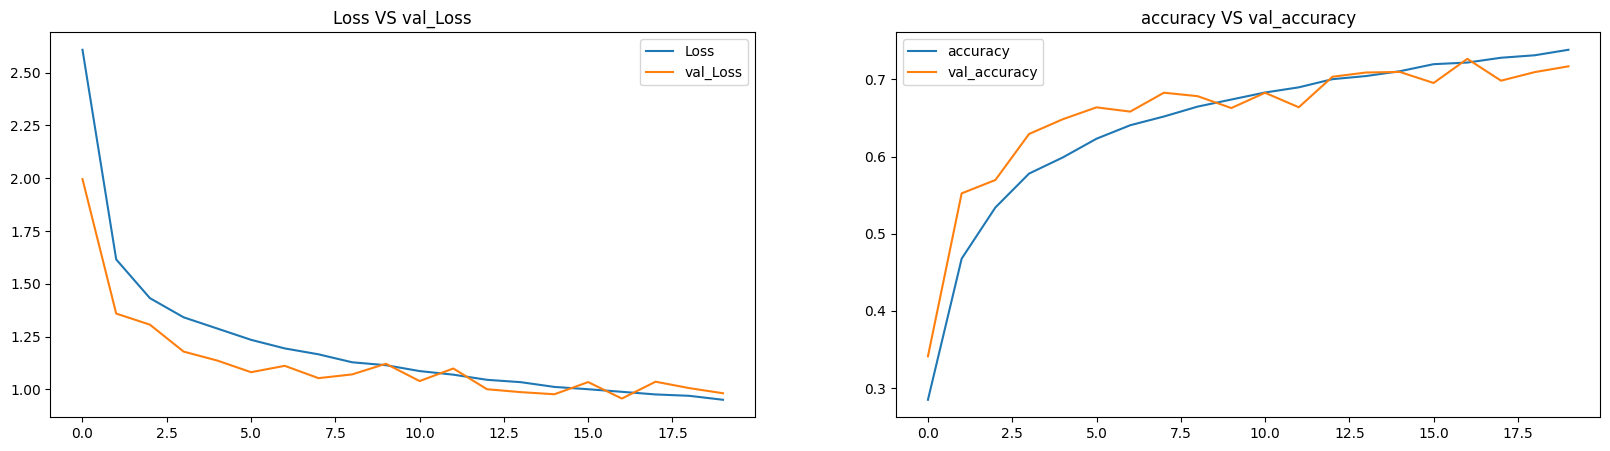

In [58]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,5))
plt.subplot(121)
plt.plot(history.history['loss'],label = 'Loss')
plt.plot(history.history['val_loss'],label = 'val_Loss')
plt.title("Loss VS val_Loss")
plt.legend()
plt.subplot(122)
plt.plot(history.history['accuracy'],label = 'accuracy')
plt.plot(history.history['val_accuracy'],label = 'val_accuracy')
plt.title("accuracy VS val_accuracy")
plt.legend()
plt.show()

In [59]:
# Evaluate the model on the test data
test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose=0)

print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")

Test Loss: 0.9822
Test Accuracy: 0.7170


## VGG16 

In [60]:
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Flatten, Input
from tensorflow.keras.utils import to_categorical
import numpy as np
import matplotlib.pyplot as plt


(x_train, y_train), (x_test, y_test) = cifar10.load_data()

In [61]:
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

In [62]:
x_train.shape

(50000, 32, 32, 3)

In [66]:
vgg16 = VGG16(weights='imagenet', include_top=False, input_shape=(32, 32, 3))

for layer in vgg16.layers:
    layer.trainable = False

inputs = Input(shape=(32, 32, 3))
x = vgg16(inputs)
x = Flatten()(x)
x = Dense(256, activation='relu')(x)
x = Dropout(0.4)(x)
x = Dense(128,activation='relu')(x)
x = Dropout(0.4)(x)
x = Dense(64,activation = 'relu')(x)
x = Dropout(0.4)(x)
outputs = Dense(10, activation='softmax')(x)

model = Model(inputs=inputs, outputs=outputs)

In [67]:
model.summary()

Model: "functional_118"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_14 (InputLayer)     │ (None, 32, 32, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ vgg16 (Functional)              │ (None, 1, 1, 512)      │    14,714,688 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_12 (Flatten)            │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_30 (Dense)                │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_13 (Dropout)            │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_31 (Dense)                │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_14 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_32 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_15 (Dropout)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_33 (Dense)                │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,887,818 (56.79 MB)

 Trainable params: 173,130 (676.29 KB)

 Non-trainable params: 14,714,688 (56.13 MB)

In [68]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])


history = model.fit(x_train, y_train, epochs=10, batch_size=64, validation_data=(x_test, y_test), verbose=1)

Epoch 1/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 16s 14ms/step - accuracy: 0.2837 - loss: 1.9621 - val_accuracy: 0.5113 - val_loss: 1.3900
Epoch 2/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - accuracy: 0.4803 - loss: 1.5064 - val_accuracy: 0.5473 - val_loss: 1.2969
Epoch 3/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - accuracy: 0.5250 - loss: 1.4022 - val_accuracy: 0.5618 - val_loss: 1.2679
Epoch 4/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - accuracy: 0.5477 - loss: 1.3476 - val_accuracy: 0.5760 - val_loss: 1.2243
Epoch 5/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - accuracy: 0.5573 - loss: 1.3146 - val_accuracy: 0.5881 - val_loss: 1.2008
Epoch 6/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - accuracy: 0.5683 - loss: 1.2819 - val_accuracy: 0.5900 - val_loss: 1.1906
Epoch 7/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - accuracy: 0.5732 - loss: 1.2709 - val_accuracy: 0.5911 - val_loss: 1.1767
Epoch 8/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - accuracy: 0.5859 - loss: 1.2362 - val_accuracy: 

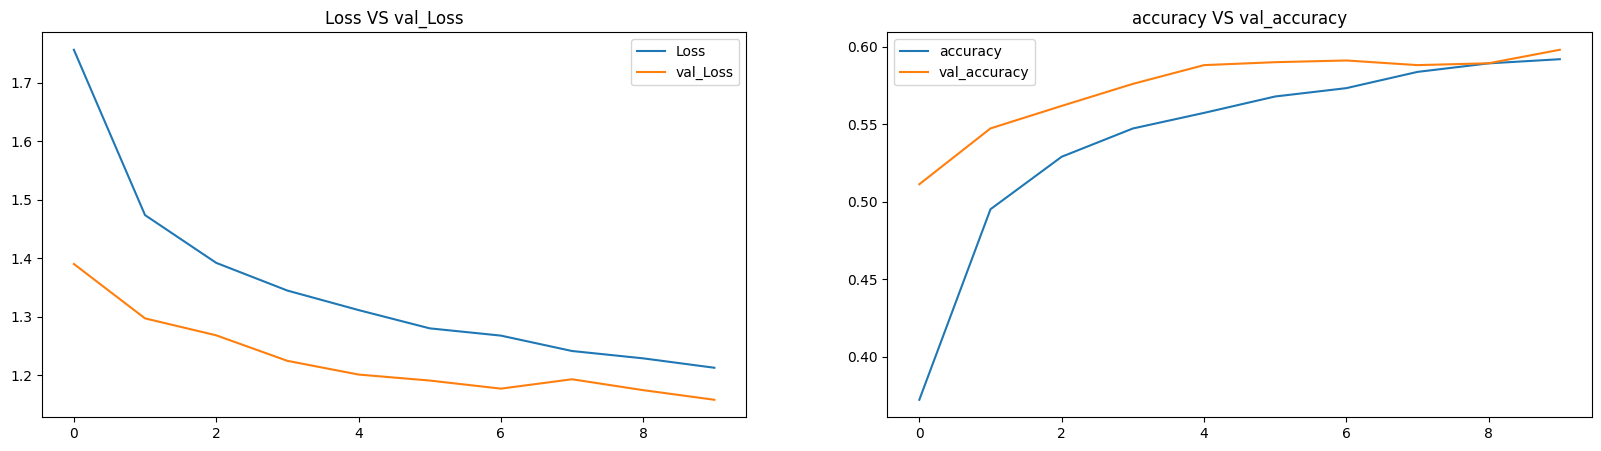

In [70]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,5))
plt.subplot(121)
plt.plot(history.history['loss'],label = 'Loss')
plt.plot(history.history['val_loss'],label = 'val_Loss')
plt.title("Loss VS val_Loss")
plt.legend()
plt.subplot(122)
plt.plot(history.history['accuracy'],label = 'accuracy')
plt.plot(history.history['val_accuracy'],label = 'val_accuracy')
plt.title("accuracy VS val_accuracy")
plt.legend()
plt.show()


Test Loss: 1.1577
Test Accuracy: 0.5980

Making predictions on the first 5 test images...
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
Predicted Digits: [3 8 8 8 6]
True Digits: [3 8 8 0 6]


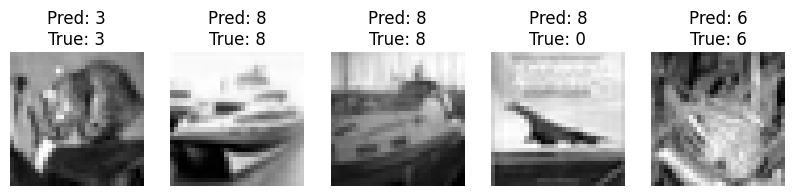

In [69]:
# Evaluate the model
test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose=0)
print(f"\nTest Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")

# Make predictions on the first 5 test images
print("\nMaking predictions on the first 5 test images...")
predictions = model.predict(x_test[:5])
predicted_digits = np.argmax(predictions, axis=1)
true_labels = np.argmax(y_test[:5], axis=1)

print("Predicted Digits:", predicted_digits)
print("True Digits:", true_labels)

# Visualize predictions
plt.figure(figsize=(10, 5))
for i in range(5):
    plt.subplot(1, 5, i + 1)
    # The image data has 3 channels, so we can display just one
    plt.imshow(x_test[i][..., 0], cmap='gray')
    plt.title(f"Pred: {predicted_digits[i]}\nTrue: {true_labels[i]}")
    plt.axis('off')
plt.show()

# ResNet 

In [71]:
resnet_base = ResNet50(weights='imagenet', include_top=False, input_shape=(32, 32, 3))

for layer in resnet_base.layers:
    layer.trainable = False


inputs = Input(shape=(32, 32, 3))
x = vgg16(inputs)
x = Flatten()(x)
x = Dense(256, activation='relu')(x)
x = Dropout(0.4)(x)
# x = Dense(128,activation='relu')(x)
# x = Dropout(0.4)(x)
x = Dense(64,activation = 'relu')(x)
x = Dropout(0.4)(x)
outputs = Dense(10, activation='softmax')(x)

model = Model(inputs=inputs, outputs=outputs)

94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [73]:
# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])


history = model.fit(x_train, y_train, epochs=10, batch_size=64, validation_data=(x_test, y_test), verbose=1)

Epoch 1/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 14s 13ms/step - accuracy: 0.5815 - loss: 1.2237 - val_accuracy: 0.5905 - val_loss: 1.1669
Epoch 2/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - accuracy: 0.5896 - loss: 1.2055 - val_accuracy: 0.6044 - val_loss: 1.1451
Epoch 3/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - accuracy: 0.5955 - loss: 1.1892 - val_accuracy: 0.6010 - val_loss: 1.1489
Epoch 4/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - accuracy: 0.6059 - loss: 1.1602 - val_accuracy: 0.6033 - val_loss: 1.1356
Epoch 5/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - accuracy: 0.6043 - loss: 1.1596 - val_accuracy: 0.6075 - val_loss: 1.1344
Epoch 6/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - accuracy: 0.6058 - loss: 1.1478 - val_accuracy: 0.6090 - val_loss: 1.1210
Epoch 7/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - accuracy: 0.6144 - loss: 1.1260 - val_accuracy: 0.6103 - val_loss: 1.1203
Epoch 8/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - accuracy: 0.6154 - loss: 1.1160 - val_accuracy: 

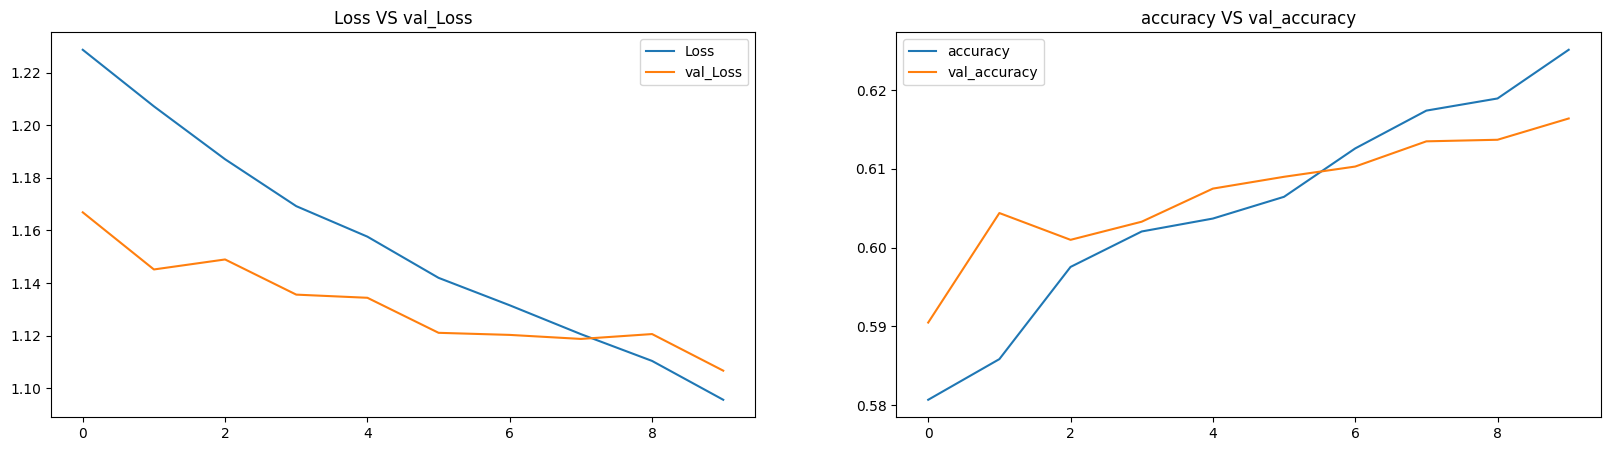

In [74]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,5))
plt.subplot(121)
plt.plot(history.history['loss'],label = 'Loss')
plt.plot(history.history['val_loss'],label = 'val_Loss')
plt.title("Loss VS val_Loss")
plt.legend()
plt.subplot(122)
plt.plot(history.history['accuracy'],label = 'accuracy')
plt.plot(history.history['val_accuracy'],label = 'val_accuracy')
plt.title("accuracy VS val_accuracy")
plt.legend()
plt.show()

# InceptionNetV3

In [5]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam

# Load the CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

# Take 1000 random samples
total_samples = x_train.shape[0]
random_indices = np.random.choice(total_samples, 10000, replace=False)
x_train_1000 = x_train[random_indices]
y_train_1000 = y_train[random_indices]

# Preprocess the data for InceptionV3
# Resize images to 299x299 to match InceptionV3 input
x_train_1000 = tf.image.resize(x_train_1000, (299, 299))
x_test = tf.image.resize(x_test, (299, 299))

# Convert labels to one-hot encoding
num_classes = 10
y_train_1000 = to_categorical(y_train_1000, num_classes)
y_test = to_categorical(y_test, num_classes)

# Load the InceptionV3 base model with pre-trained weights
base_model = InceptionV3(weights='imagenet', include_top=False, input_shape=(299, 299, 3))

# Freeze all layers in the base model
for layer in base_model.layers:
    layer.trainable = False

# Add new classification layers
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
predictions = Dense(num_classes, activation='softmax')(x)

# Create the full model
model = Model(inputs=base_model.input, outputs=predictions)

In [6]:
# Compile the model for the first phase
model.compile(optimizer=Adam(learning_rate=0.001), 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

# Train only the top layers with your 1000 samples
print("Training the new top layers...")
history = model.fit(
    x_train_1000, y_train_1000,
    epochs=10,  # A smaller number of epochs for initial training
    validation_data=(x_test, y_test)
)

Training the new top layers...
Epoch 1/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 71s 180ms/step - accuracy: 0.2109 - loss: 24.1121 - val_accuracy: 0.3200 - val_loss: 2.3591
Epoch 2/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 44s 140ms/step - accuracy: 0.3047 - loss: 2.2604 - val_accuracy: 0.3092 - val_loss: 1.9515
Epoch 3/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 44s 140ms/step - accuracy: 0.3421 - loss: 1.8594 - val_accuracy: 0.3701 - val_loss: 1.7609
Epoch 4/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 44s 140ms/step - accuracy: 0.3656 - loss: 1.7866 - val_accuracy: 0.3623 - val_loss: 1.7778
Epoch 5/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 44s 140ms/step - accuracy: 0.3865 - loss: 1.7250 - val_accuracy: 0.3626 - val_loss: 1.7498
Epoch 6/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 44s 139ms/step - accuracy: 0.3866 - loss: 1.6965 - val_accuracy: 0.3966 - val_loss: 1.6818
Epoch 7/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 43s 139ms/step - accuracy: 0.4091 - loss: 1.6534 - val_accuracy: 0.3802 - val_loss: 1.7471
Epoch 8/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 43s 139ms/s

# MobileNet 

In [7]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.applications import MobileNet
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam

# Load the CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

# Take 10000 random samples
total_samples = x_train.shape[0]
random_indices = np.random.choice(total_samples, 10000, replace=False)
x_train_10000 = x_train[random_indices]
y_train_10000 = y_train[random_indices]

# Preprocess the data for MobileNet
# Resize images to 224x224 to match MobileNet input
x_train_10000 = tf.image.resize(x_train_10000, (224, 224))
x_test = tf.image.resize(x_test, (224, 224))

# Convert labels to one-hot encoding
num_classes = 10
y_train_10000 = to_categorical(y_train_10000, num_classes)
y_test = to_categorical(y_test, num_classes)

# Load the MobileNet base model with pre-trained ImageNet weights
# 'include_top=False' removes the final classification layer
base_model = MobileNet(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze all layers in the base model
base_model.trainable = False

# Add new classification layers
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
predictions = Dense(num_classes, activation='softmax')(x)

# Create the new model
model = Model(inputs=base_model.input, outputs=predictions)

17225924/17225924 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [9]:
# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

# Train only the top layers with your 10,000 samples
print("Training the new top layers...")
history = model.fit(
    x_train_10000, y_train_10000,
    epochs=10,  # Fewer epochs are often sufficient for this phase
    validation_data=(x_test, y_test)
)

Training the new top layers...
Epoch 1/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 23s 57ms/step - accuracy: 0.5922 - loss: 1.1639 - val_accuracy: 0.4856 - val_loss: 1.4919
Epoch 2/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 14s 45ms/step - accuracy: 0.6069 - loss: 1.1163 - val_accuracy: 0.5024 - val_loss: 1.4366
Epoch 3/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 14s 44ms/step - accuracy: 0.6282 - loss: 1.0357 - val_accuracy: 0.4799 - val_loss: 1.5207
Epoch 4/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 14s 44ms/step - accuracy: 0.6493 - loss: 0.9950 - val_accuracy: 0.4748 - val_loss: 1.6100
Epoch 5/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 14s 44ms/step - accuracy: 0.6666 - loss: 0.9743 - val_accuracy: 0.5096 - val_loss: 1.4489
Epoch 6/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 14s 44ms/step - accuracy: 0.6784 - loss: 0.9202 - val_accuracy: 0.5073 - val_loss: 1.5143
Epoch 7/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 14s 44ms/step - accuracy: 0.6882 - loss: 0.8699 - val_accuracy: 0.5010 - val_loss: 1.5384
Epoch 8/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 14s 43ms/step - acc